In [1]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns


### Handling latitude and longitude data

In [ ]:
# Read longitude and latitude data
from netCDF4 import Dataset
import numpy as np

nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]

# Find the index ranges corresponding to the longitude and latitude bounds
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)

# Convert boolean masks to explicit index arrays
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# Extract the longitude and latitude values for Manchester subset
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]

# pcolormesh expects 2D lon/lat grids; if lon_Man and lat_Man are 1D, expand to 2D with meshgrid
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)

### Read the data of the Manchester area

In [ ]:
# Read data sequentially (translated to English and formatted as code)
from netCDF4 import Dataset
import numpy as np

# Open netCDF files
# nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_emroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_albimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_emwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_WALL_1km_masked_gapfilled_QC.nc', mode='r')
# nc_windhgtcanyon = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WIND_HGT_CANYON_1km_masked_gapfilled_QC.nc', mode='r')
nc_htroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_HT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_canyonhwr = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_CANYON_HWR_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtlunitroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTLUNIT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtroadperv = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTROAD_PERV_1km_masked_gapfilled_QC.nc', mode='r')

# Read variable subsets using previously defined lat_idx and lon_idx (assumes lat_idx and lon_idx exist)
albroof_Man = nc_albroof.variables['ALB_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albroof.close()
print('1')

emroof_Man = nc_emroof.variables['EM_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emroof.close()
print('2')

albimproad_Man = nc_albimproad.variables['ALB_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albimproad.close()
print('3')

emimproad_Man = nc_emimproad.variables['EM_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emimproad.close()
print('4')

albperroad_Man = nc_albperroad.variables['ALB_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albperroad.close()
print('5')

emperroad_Man = nc_emperroad.variables['EM_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emperroad.close()
print('6')

albwall_Man = nc_albwall.variables['ALB_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albwall.close()
print('7')

emwall_Man = nc_emwall.variables['EM_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emwall.close()
print('8')

# If WIND_HGT_CANYON file is needed, uncomment the following lines:
# windhgtcanyon_Man = nc_windhgtcanyon.variables['WIND_HGT_CANYON'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
# nc_windhgtcanyon.close()
# print('9')

htroof_Man = nc_htroof.variables['HT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_htroof.close()
print('9')

canyonhwr_Man = nc_canyonhwr.variables['CANYON_HWR'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_canyonhwr.close()
print('10')

wtlunitroof_Man = nc_wtlunitroof.variables['WTLUNIT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtlunitroof.close()
print('11')

wtroadperv_Man = nc_wtroadperv.variables['WTROAD_PERV'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtroadperv.close()
print('12')

# Close any remaining files if opened earlier
# nc_albroof, nc_windhgtcanyon may need to be closed where they were opened

1
2
3
4
5
6
7
8
9
10
11
12


### Image extraction of the shp file in the Manchester area

In [ ]:
# Load Manchester shapefile
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

shapefile_path = "D:/A_sem2/ERP/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

# Select administrative units in Great Manchester, UK
g1 = gdf[(gdf['name'] == 'Manchester') & (gdf['iso_a2'] == 'GB')]
g2 = gdf[(gdf['name'] == 'Stockport') & (gdf['iso_a2'] == 'GB')]
g3 = gdf[(gdf['name'] == 'Wigan') & (gdf['iso_a2'] == 'GB')]
g4 = gdf[(gdf['name'] == 'Bolton') & (gdf['iso_a2'] == 'GB')]
g5 = gdf[(gdf['name'] == 'Salford') & (gdf['iso_a2'] == 'GB')]
g6 = gdf[(gdf['name'] == 'Trafford') & (gdf['iso_a2'] == 'GB')]
g7 = gdf[(gdf['name'] == 'Tameside') & (gdf['iso_a2'] == 'GB')]
g8 = gdf[(gdf['name'] == 'Oldham') & (gdf['iso_a2'] == 'GB')]
g9 = gdf[(gdf['name'] == 'Rochdale') & (gdf['iso_a2'] == 'GB')]
g10 = gdf[(gdf['name'] == 'Bury') & (gdf['iso_a2'] == 'GB')]

# Combine GeoDataFrames into one GeoDataFrame (axis=0 concatenates rows)
gdf_combined = gpd.GeoDataFrame(pd.concat([g1, g2, g3, g4, g5, g6, g7, g8, g9, g10], axis=0),
                                crs=gdf.crs)

# Merge polygons into a single (Multi)Polygon for Manchester area
manchester_polygon = gdf_combined.unary_union

def mask_data_inside_polygon(lon_grid, lat_grid, data_array, polygon):
    """
    Filter a 2D gridded dataset to keep only points inside a polygon; outside points become np.nan.

    Parameters:
    - lon_grid: 2D numpy array of longitudes
    - lat_grid: 2D numpy array of latitudes
    - data_array: 2D numpy array of data aligned with the lon/lat grids
    - polygon: shapely Polygon or MultiPolygon (the mask polygon)

    Returns:
    - filtered_data: 2D numpy array where points outside polygon are np.nan
    """
    # Flatten lon/lat grids and create shapely Points
    points = [Point(x, y) for x, y in zip(lon_grid.flatten(), lat_grid.flatten())]
    # Create boolean mask whether each point is within the polygon
    mask = np.array([polygon.contains(pt) for pt in points])

    # Create an output array filled with np.nan
    filtered_data = np.full(data_array.size, np.nan)

    # Keep values inside polygon
    filtered_data[mask] = data_array.flatten()[mask]

    # Reshape back to original 2D shape
    filtered_data = filtered_data.reshape(data_array.shape)

    return filtered_data

# Example usage (uncomment to test):
# filtered_data = mask_data_inside_polygon(lon_grid, lat_grid, wtroadperv_Man, manchester_polygon)
# plt.figure(figsize=(8,6))
# plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
# plt.colorbar()
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('WTROAD_PERV (Manchester subset)')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17880\3482504278.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  manchester_polygon = gdf_combined.unary_union


In [ ]:
# Store the read variables sequentially into `features`
import numpy as np

# Determine the 2D shape of each variable
height, width = albroof_Man.shape

# Number of features you have read (replace with the actual count if different)
num_features = 12

# Create a 3D array with shape (num_features, height, width)
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# Store each variable into the features array (indices must match your variable list)
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
# features[8, :, :] = windhgtcanyon_Man  # uncomment if available
features[8, :, :] = htroof_Man
features[9, :, :] = canyonhwr_Man
features[10, :, :] = wtlunitroof_Man
features[11, :, :] = wtroadperv_Man

print(features.shape)
display(emroof_Man[0, 0])
display(features[:, 0, 0])

# Example: flatten the 5th feature (index 4)
ff = features[4, :, :]
ff_flat = ff.reshape(-1)
print(ff_flat.shape)

(12, 50, 112)


masked

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(5600,)


### Use klaML for prediction

In [69]:
# =============load model================
import pickle
target_name = 'HIAmean'
automl = pickle.load(open('ERP_automl_model_' + target_name + '.pkl', 'rb'))


In [ ]:
# Reshape features into samples and predict with the trained automl model
# Get shapes
num_features, height, width = features.shape

# Reshape features so each grid cell is a sample: (height*width, num_features)
X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

# Predict with automl (ensure `automl` is already fitted/loaded)
y_pred_klaml = automl.predict(X_klaml)

# Reshape predictions back to the 2D grid shape
y_pred_grid_klaml = y_pred_klaml.reshape(height, width)

# Example: inspect the 5th feature flattened (index 4)
kff = X_klaml[:, 4]
print(kff.shape)

# Create a mask for grid points that are entirely NaN across all features
# (True where all feature layers at that grid cell are NaN)
nan_mask = np.isnan(features).all(axis=0)  # shape (height, width)

# Apply the mask to set predicted values at those grid cells to NaN
y_pred_grid_klaml[nan_mask] = np.nan

(5600, 12)
(5600,)


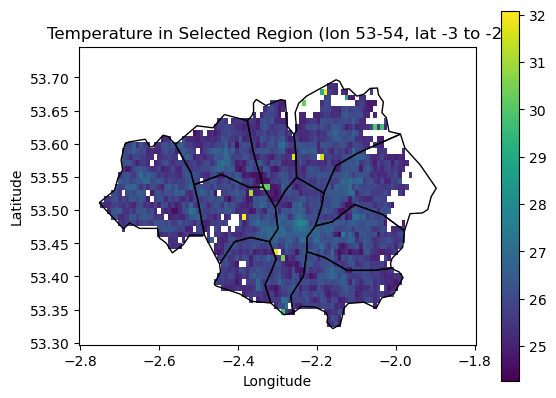

In [ ]:
# Reshape features into samples and predict with the trained automl model
# Get shapes
num_features, height, width = features.shape

# Reshape features so each grid cell is a sample: (height*width, num_features)
# i.e. X_klaml.shape == (height*width, num_features)
X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

# Predict with automl (ensure `automl` is already fitted/loaded)
y_pred_klaml = automl.predict(X_klaml)

# Reshape predictions back to the 2D grid shape
y_pred_grid_klaml = y_pred_klaml.reshape(height, width)

# Example: inspect the 5th feature flattened (index 4)
kff = X_klaml[:, 4]
print(kff.shape)

# Create a mask for grid points that are entirely NaN across all features
# (True where all feature layers at that grid cell are NaN)
nan_mask = np.isnan(features).all(axis=0)  # shape (height, width)

# Apply the mask to set predicted values at those grid cells to NaN
y_pred_grid_klaml[nan_mask] = np.nan

In [ ]:
# 
import shap
feature_names = [
    'ALB ROOF',         # features[0, :, :]
    'EM ROOF',          # features[1, :, :]
    'ALB IMPROAD',      # features[2, :, :]
    'EM IMPROAD',       # features[3, :, :]
    'ALB PERROUD',      # features[4, :, :]
    'EM PERROUD',       # features[5, :, :]
    'ALB WALL',         # features[6, :, :]
    'EM WALL',          # features[7, :, :]
    # 'WIND HGT CANYON',   # features[8, :, :]
    'HT ROOF',          # features[9, :, :]
    'CANYON HWR',       # features[10, :, :]
    'WTLUNIT ROOF',     # features[11, :, :]
    'WTROAD PERV',      # features[12, :, :]
]


### Calculate shap

In [ ]:
# ;oad explainer
model_klaml = automl.model.estimator
explainer_klaml = shap.TreeExplainer(model_klaml)


In [ ]:
# calculate shap
shap_values_klaml = explainer_klaml.shap_values(X_klaml)

# save shap
np.save('ERP_automl_model_' + target_name + '_shap.npy', shap_values_klaml)



In [ ]:
#load shap
shap_values_klaml = np.load('ERP_automl_model_' + target_name + '_shap.npy')  # shape = (n_samples, n_features)

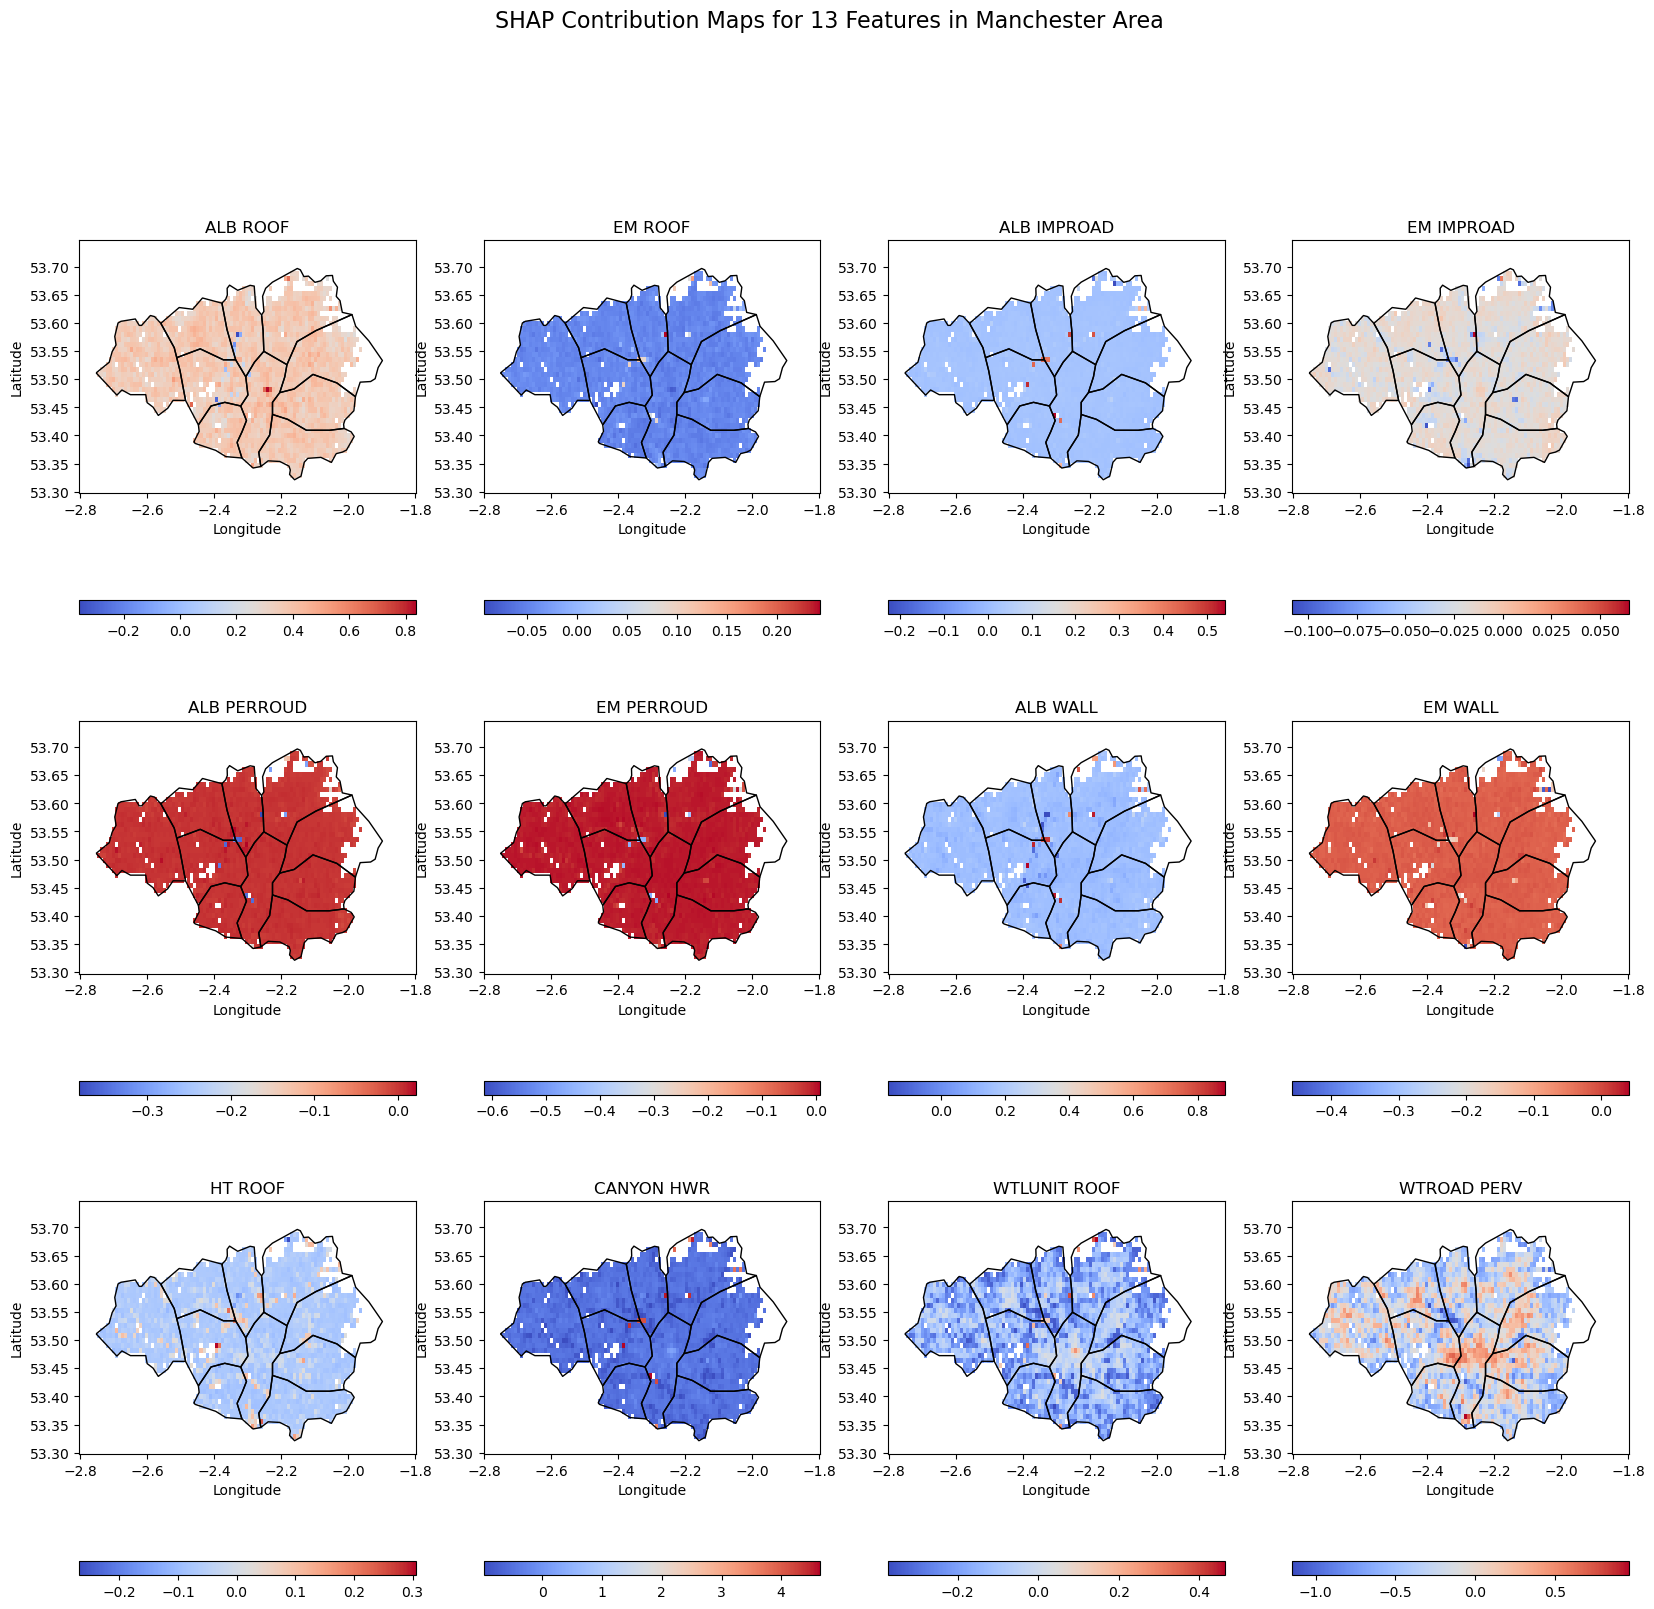

In [ ]:
import matplotlib.gridspec as gridspec
n_features = shap_values_klaml.shape[1]
ncols = 4
nrows = (n_features + ncols - 1) // ncols

# fig = plt.figure(figsize=(ncols * 5, nrows * 4))
# gs = gridspec.GridSpec(nrows , ncols*2, width_ratios = [20,1] * ncols, wspace=0.3)
fig = plt.figure(figsize=(ncols * 5, 3 * nrows * 2))
gs = gridspec.GridSpec(nrows * 2, ncols, height_ratios=[25, 1] * nrows, hspace=0.3)

# # Assuming shap_grid_masked has shape (height, width), initialize the accumulation matrix to 0
# sum_matrix_klaml = np.zeros((50, 112), dtype=float)

for i in range(n_features):
    # row = i // ncols
    # col = i % ncols

    # ax = fig.add_subplot(gs[row, col * 2])
    # cax = fig.add_subplot(gs[row, col * 2 + 1])

    row = (i // ncols) * 2
    col = i % ncols

    ax = fig.add_subplot(gs[row, col])      # row where the plot is placed
    cax = fig.add_subplot(gs[row + 1, col]) # colorbar placed on the next row, same column

    shap_grid = shap_values_klaml[:, i].reshape(height, width)
    shap_grid_masked = mask_data_inside_polygon(lon_grid, lat_grid, shap_grid, manchester_polygon)
    shap_grid_masked[nan_mask] = np.nan
    im = ax.pcolormesh(lon_grid, lat_grid, shap_grid_masked,
                       shading='auto', cmap='coolwarm')
    
    # # print(shap_grid_masked.shape)
    #  # When accumulating, be careful with NaNs. To avoid NaN affecting accumulation, you can use np.nan_to_num to convert to 0 or handle NaNs more safely
    # sum_matrix_klaml += np.nan_to_num(shap_grid_masked, nan=0.0)


    ax.set_title(f'{feature_names[i]}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    gdf_combined.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

    # Create a dedicated colorbar for this plot
    plt.colorbar(im, cax=cax, orientation='horizontal')
    
for j in range(n_features, nrows * ncols):
    r = (j // ncols) * 2
    c = j % ncols
    fig.add_subplot(gs[r, c]).axis('off')
    fig.add_subplot(gs[r + 1, c]).axis('off')

plt.suptitle('SHAP Contribution Maps for 13 Features in Manchester Area', fontsize=16)

plt.savefig('ERP_' + target_name + '_shap_contri.png', dpi=300) # , bbox_inches='tight'
plt.show()

In [ ]:

X_df = pd.DataFrame(X_klaml, columns=feature_names)

valid_mask = ~X_df.isnull().all(axis=1)
X_df = X_df[valid_mask]
print(X_df.shape)


(4596, 12)


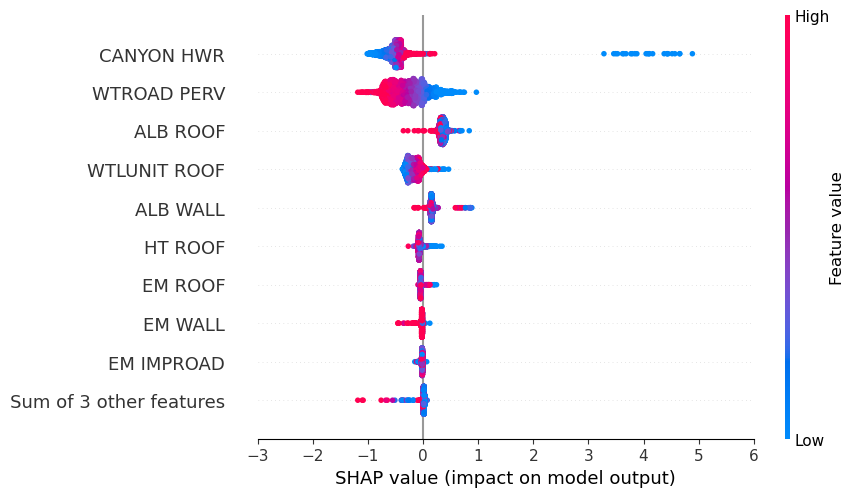

In [ ]:
# plt.figure(figsize=(10, 6))
# shap.summary_plot(explainer_klaml(X_df), plot_type='bar', show=False)
# plt.savefig('ERP_' + target_name + '_shap_summary.png', dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()

plt.figure(figsize=(10, 6))
plt.xlim([-3, 6]) 
shap.plots.beeswarm(explainer_klaml(X_df), show=False)
plt.savefig('ERP_' + target_name + '_shap_beeswarm.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()